In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r'/content/drive/MyDrive/Transportation/Bike_Date.csv', encoding = "ISO-8859-1")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,Date,Rented Bike Count,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Â°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017


In [ ]:
df.shape

(8760, 17)

In [ ]:
ddf = pd.read_csv(r'/content/drive/MyDrive/Transportation/seoul.csv', encoding = "ISO-8859-1")

In [ ]:
df['cloudcover'] = ddf['cloudcover']
df['FeelsLikeC'] = ddf['FeelsLikeC']
df['sunHour'] = ddf['sunHour']
df['HeatIndexC'] = ddf['HeatIndexC']
df['winddirDegree'] = ddf['winddirDegree']
df['WindChillC'] = ddf['WindChillC']
df['maxtempC'] = ddf['maxtempC']
df['mintempC'] = ddf['mintempC']
df['pressure'] = ddf['pressure']
df['windspeedKmph'] = ddf['windspeedKmph']
df['visibility2'] = ddf['visibility']
df['tempC2'] = ddf['tempC']
df['Dew2'] = ddf['DewPointC']
df['humidity2'] = ddf['humidity']
df['snow2'] = ddf['totalSnow_cm']
df.head()

,Date,Rented Bike Count,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Â°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,cloudcover,FeelsLikeC,sunHour,HeatIndexC,winddirDegree,WindChillC,maxtempC,mintempC,pressure,windspeedKmph,visibility2,tempC2,Dew2,humidity2,snow2
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,0,-8,7.0,-2,321,-8,2,-4,1030,18,10,-3,-17,31,0.1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,0,-7,7.0,-2,323,-7,2,-4,1030,17,10,-3,-17,31,0.1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,0,-6,7.0,-2,325,-6,2,-4,1030,15,10,-3,-17,30,0.1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,0,-6,7.0,-1,327,-6,2,-4,1031,14,10,-4,-17,29,0.1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,0,-6,7.0,-1,329,-6,2,-4,1031,13,10,-4,-18,26,0.1


In [ ]:
def get_min(time_str):
    """Get Seconds from time."""
    h, m, pm = time_str.replace(' ', ':').split(':')
    return (int(h)) * 60 + int(m)

i = 0
df['sunrise'] = 0
df['sunset'] = 0
for index, row in df.iterrows():
  df['sunrise'].loc[index] = get_min(ddf['sunrise'].iloc[i])
  df['sunset'].loc[index] = get_min(ddf['sunset'].iloc[i]) + 12 * 60
  i = i + 1

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Â°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,cloudcover,FeelsLikeC,sunHour,HeatIndexC,winddirDegree,WindChillC,maxtempC,mintempC,pressure,windspeedKmph,visibility2,tempC2,Dew2,humidity2,snow2,sunrise,sunset
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,0,-8,7.0,-2,321,-8,2,-4,1030,18,10,-3,-17,31,0.1,448,1034
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,0,-7,7.0,-2,323,-7,2,-4,1030,17,10,-3,-17,31,0.1,448,1034
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,0,-6,7.0,-2,325,-6,2,-4,1030,15,10,-3,-17,30,0.1,448,1034
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,0,-6,7.0,-1,327,-6,2,-4,1031,14,10,-4,-17,29,0.1,448,1034
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,0,-6,7.0,-1,329,-6,2,-4,1031,13,10,-4,-18,26,0.1,448,1034


In [ ]:
adf = pd.read_excel(r'/content/drive/MyDrive/Transportation/air.xlsx')
adf.head()

,date,pm25,pm10,o3,no2,so2,co
0,2017-12-01,51,45,6,49,9,9
1,2017-12-02,83,55,3,45,7,9
2,2017-12-03,107,46,20,25,7,6
3,2017-12-04,83,26,22,26,7,4
4,2017-12-05,48,35,6,40,7,7


In [ ]:
big = [j for j in range(365) for i in range(24)]
adf = adf.iloc[big]
adf.reset_index(drop=True, inplace=True)
# adf.reindex([i for i in range(len(df.index))])
adf.head()

,date,pm25,pm10,o3,no2,so2,co
0,2017-12-01,51,45,6,49,9,9
1,2017-12-01,51,45,6,49,9,9
2,2017-12-01,51,45,6,49,9,9
3,2017-12-01,51,45,6,49,9,9
4,2017-12-01,51,45,6,49,9,9


In [ ]:
df['co'] = adf[' co']
df['no2'] = adf[' no2']
df['o3'] = adf[' o3']
df['pm10'] = adf[' pm10']
df['pm25'] = adf[' pm25']
df['so2'] = adf[' so2']

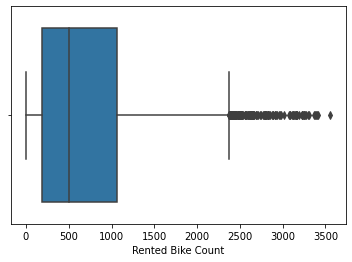

In [ ]:
# Outlier Removal
sns.boxplot(x=df['Rented Bike Count'])

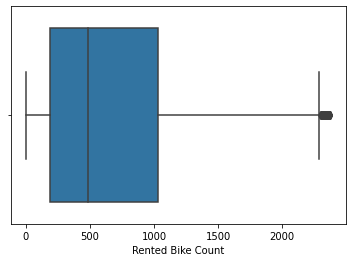

In [ ]:
Q1 = df['Rented Bike Count'].quantile(0.25)
Q3 = df['Rented Bike Count'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['Rented Bike Count'] >= Q1 - 1.5 * IQR) & (df['Rented Bike Count'] <= Q3 + 1.5 *IQR)
df = df.loc[filter]  
sns.boxplot(x=df['Rented Bike Count'])

In [ ]:
df.shape

(8760, 40)

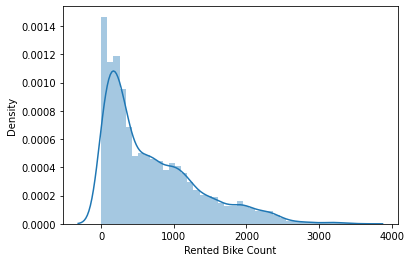

In [ ]:
#histogram
sns.distplot(df['Rented Bike Count'])

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df['Rented Bike Count'].skew())
print("Kurtosis: %f" % df['Rented Bike Count'].kurt())

Skewness: 1.153428
Kurtosis: 0.853387


In [ ]:
df['sqrt output'] = np.sqrt(df['Rented Bike Count'])
ysqrt = df['sqrt output']

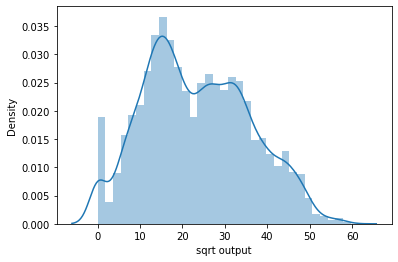

In [ ]:
sns.distplot(df['sqrt output'])

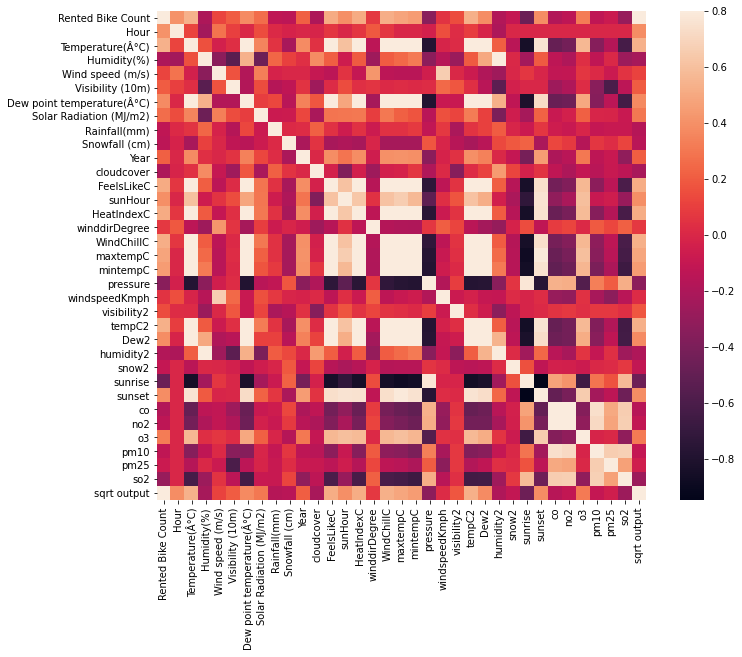

In [ ]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
cols_to_drop = ['Date', 'sqrt output']
df.drop(cols_to_drop, inplace=True, axis=1)
df.head()

,Rented Bike Count,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Â°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year,cloudcover,FeelsLikeC,sunHour,HeatIndexC,winddirDegree,WindChillC,maxtempC,mintempC,pressure,windspeedKmph,visibility2,tempC2,Dew2,humidity2,snow2,sunrise,sunset,co,no2,o3,pm10,pm25,so2
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,0,-8,7.0,-2,321,-8,2,-4,1030,18,10,-3,-17,31,0.1,448,1034,9,49,6,45,51,9
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,0,-7,7.0,-2,323,-7,2,-4,1030,17,10,-3,-17,31,0.1,448,1034,9,49,6,45,51,9
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,0,-6,7.0,-2,325,-6,2,-4,1030,15,10,-3,-17,30,0.1,448,1034,9,49,6,45,51,9
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,0,-6,7.0,-1,327,-6,2,-4,1031,14,10,-4,-17,29,0.1,448,1034,9,49,6,45,51,9
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,2017,0,-6,7.0,-1,329,-6,2,-4,1031,13,10,-4,-18,26,0.1,448,1034,9,49,6,45,51,9


In [ ]:
# Dummy variables
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]], drop_first=True)
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

# df.drop(['Month'], inplace=True, axis=1) # No month
# df.drop(['Year'], inplace=True, axis=1) # No year

features_to_encode = ['Seasons', 'Holiday', 'Functioning Day', 'Day', 'Month', 'Year']
# features_to_encode = ['Seasons', 'Holiday', 'Functioning Day', 'Day', 'Month']
for feature in features_to_encode:
    df = encode_and_bind(df, feature)


df.head()

,Rented Bike Count,Hour,Temperature(Â°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(Â°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),cloudcover,FeelsLikeC,sunHour,HeatIndexC,winddirDegree,WindChillC,maxtempC,mintempC,pressure,windspeedKmph,visibility2,tempC2,Dew2,humidity2,snow2,sunrise,sunset,co,no2,o3,pm10,pm25,so2,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,-8,7.0,-2,321,-8,2,-4,1030,18,10,-3,-17,31,0.1,448,1034,9,49,6,45,51,9,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,-7,7.0,-2,323,-7,2,-4,1030,17,10,-3,-17,31,0.1,448,1034,9,49,6,45,51,9,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,-6,7.0,-2,325,-6,2,-4,1030,15,10,-3,-17,30,0.1,448,1034,9,49,6,45,51,9,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,-6,7.0,-1,327,-6,2,-4,1031,14,10,-4,-17,29,0.1,448,1034,9,49,6,45,51,9,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,-6,7.0,-1,329,-6,2,-4,1031,13,10,-4,-18,26,0.1,448,1034,9,49,6,45,51,9,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
y = df['Rented Bike Count']
X = df.drop(['Rented Bike Count'], axis=1)

KFold(n_splits=10, random_state=None, shuffle=True)
rmse = 2.4239585233034693
mae = 1.5046795185840847
r2 = 0.9619097707368125
KFold(n_splits=10, random_state=None, shuffle=True)
rmse = 2.4042497038106405
mae = 1.4960959508323748
r2 = 0.9623804580843252
KFold(n_splits=10, random_state=None, shuffle=True)
rmse = 2.45526989838331
mae = 1.5135159620000875
r2 = 0.9609525628718929
KFold(n_splits=10, random_state=None, shuffle=True)
rmse = 2.398867203050613
mae = 1.4852832898542427
r2 = 0.9623845651873472
KFold(n_splits=10, random_state=None, shuffle=True)
rmse = 2.3987057033309402
mae = 1.4890473984628299
r2 = 0.9624177999417795
Finish
mean rmse = 2.4162102063757946
mean mae = 1.497724423946724
mean r2 = 0.9620090313644314


Text(0, 0.5, 'y_pred')

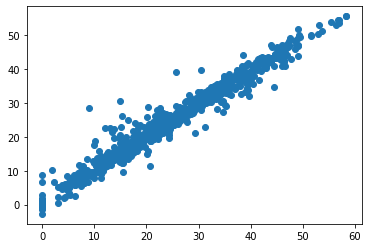

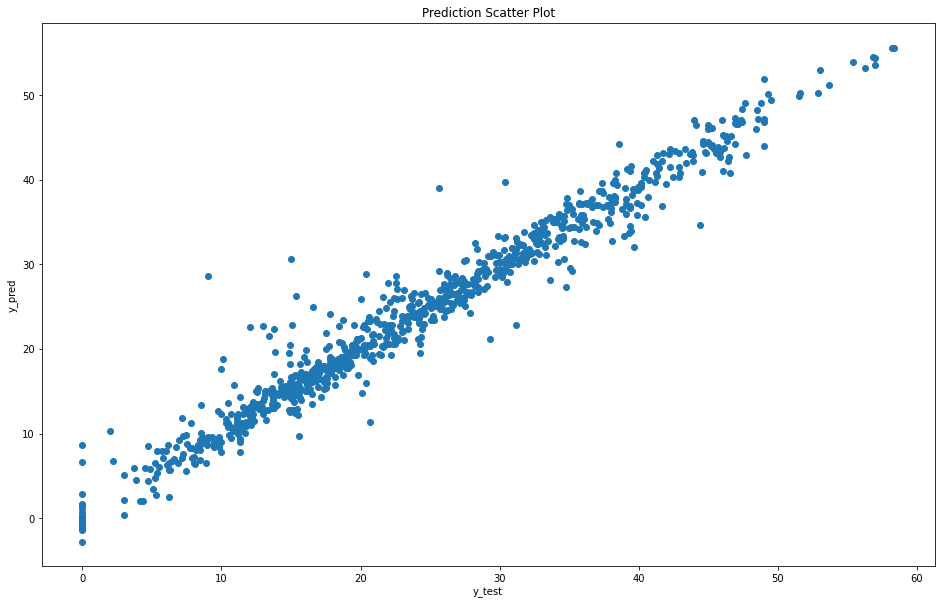

In [ ]:
from sklearn.model_selection import KFold # import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from statistics import mean 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

final_rmse_list = []
final_mae_list = []
final_r2_list = []
for i in range(5):
  kf = KFold(n_splits=10, shuffle=True) # Define the split - into 5 folds 
  kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
  print(kf) 
  X.shape
  reg = GradientBoostingRegressor(random_state=0, max_depth=4, loss='huber',n_estimators=1000, criterion='mse', alpha=0.9)
  rmse_list = []
  mae_list = []
  r2_list = []
  for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse_list.append(mean_squared_error(y_test, y_pred, squared=False))
    mae_list.append(mean_absolute_error(y_test, y_pred))
    r2_list.append(r2_score(y_test, y_pred))

  print('rmse = ' + str(mean(rmse_list)))
  final_rmse_list.append(mean(rmse_list))
  print('mae = ' + str(mean(mae_list)))
  final_mae_list.append(mean(mae_list))
  print('r2 = ' + str(mean(r2_list)))
  final_r2_list.append(mean(r2_list))

print('Finish')
print('mean rmse = ' + str(mean(final_rmse_list)))
print('mean mae = ' + str(mean(final_mae_list)))
print('mean r2 = ' + str(mean(final_r2_list)))

# plt.scatter(y_test,y_pred)
fig, ax = plt.subplots(figsize=(16, 10))
ax.scatter(y_test, y_pred)
ax.set_title('Prediction Scatter Plot')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

KFold(n_splits=10, random_state=None, shuffle=True)
rmse = 112.12160143698684
mae = 61.81270043554421
r2 = 0.9692394561711508
KFold(n_splits=10, random_state=None, shuffle=True)
rmse = 109.5125587646715
mae = 60.678144258715186
r2 = 0.9708893673322899
KFold(n_splits=10, random_state=None, shuffle=True)
rmse = 110.52985942627521
mae = 61.21513240088467
r2 = 0.9701446634104721
KFold(n_splits=10, random_state=None, shuffle=True)
rmse = 112.92411982787011
mae = 62.151844865535715
r2 = 0.9687015846687016
KFold(n_splits=10, random_state=None, shuffle=True)
rmse = 110.75179434234818
mae = 61.997673077386224
r2 = 0.9702058390997186
Finish
mean rmse = 111.16798675963037
mean mae = 61.5710990076132
mean r2 = 0.9698361821364666


Text(0, 0.5, 'y_pred')

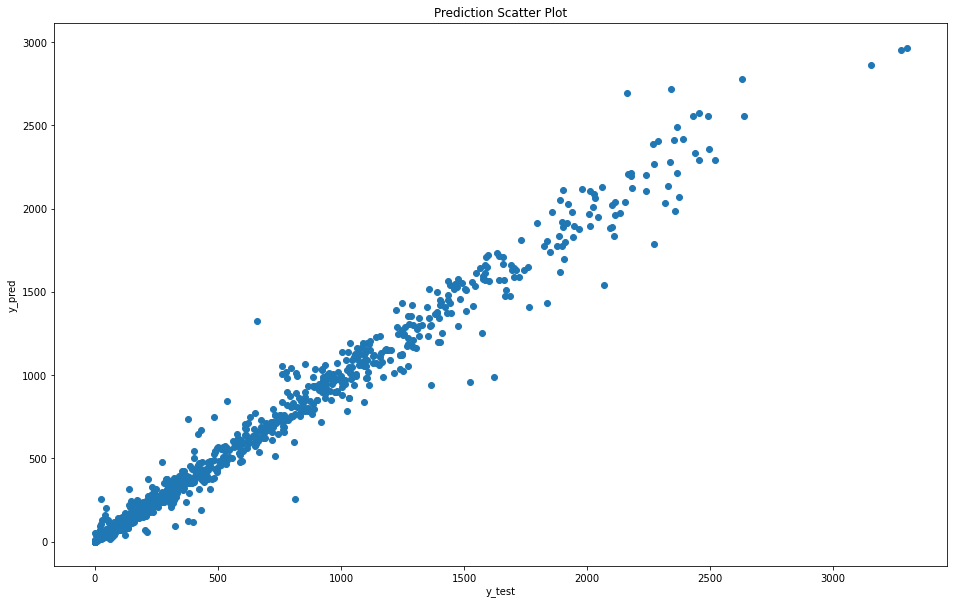

In [ ]:
y_orig = df['Rented Bike Count']
y = pd.Series(ysqrt)
X = df.drop(['Rented Bike Count'], axis=1)

from sklearn.metrics import mean_squared_error
from statistics import mean 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold # import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from statistics import mean 
from lightgbm import LGBMRegressor
import scipy

final_rmse_list = []
final_mae_list = []
final_r2_list = []

for i in range(5):

  kf = KFold(n_splits=10, shuffle=True) # Define the split - into 5 folds 
  kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
  print(kf) 
  X.shape
  # reg = GradientBoostingRegressor(random_state=0, max_depth=4, loss='huber',n_estimators=1000, criterion='mse', alpha=0.9) # 161 WOW!
  # reg = ElasticNet(random_state=0)
  # reg = SGDRegressor(max_iter=10000, tol=1e-3)
  # reg = KNeighborsRegressor(n_neighbors=25)
  # reg = tree.DecisionTreeRegressor()
  # reg = RandomForestRegressor(n_estimators=200, max_depth=None, min_samples_split=3, random_state=0) # 216! Nice
  # reg = AdaBoostRegressor(random_state=0, n_estimators=100) # 353
  # reg = BaggingRegressor(base_estimator=SVR(), n_estimators=10, random_state=0)
  # reg = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)) # 371
  reg = LGBMRegressor(n_estimators=1000) # 145! Outstanding!
  # reg = LGBMRegressor(n_estimators=1000, reg_alpha=0.35)


  rmse_list = []
  mae_list = []
  r2_list = []
  for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    Q1 = y_train.quantile(0.25)
    Q3 = y_train.quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    filter = (y_train >= Q1 - 1.5 * IQR) & (y_train <= Q3 + 1.5 *IQR)
    y_train = y_train.loc[filter] 
    X_train = X_train.loc[filter] 

    y_orig_train, y_orig_test = y_orig.iloc[train_index], y_orig.iloc[test_index]
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    y_orig_pred = np.square(y_pred)

    rmse_list.append(mean_squared_error(y_orig_test, y_orig_pred, squared=False))
    mae_list.append(mean_absolute_error(y_orig_test, y_orig_pred))
    r2_list.append(r2_score(y_orig_test, y_orig_pred))
  
  print('rmse = ' + str(mean(rmse_list)))
  final_rmse_list.append(mean(rmse_list))
  print('mae = ' + str(mean(mae_list)))
  final_mae_list.append(mean(mae_list))
  print('r2 = ' + str(mean(r2_list)))
  final_r2_list.append(mean(r2_list))

print('Finish')
print('mean rmse = ' + str(mean(final_rmse_list)))
print('mean mae = ' + str(mean(final_mae_list)))
print('mean r2 = ' + str(mean(final_r2_list)))

fig, ax = plt.subplots(figsize=(16, 10))
ax.scatter(y_orig_test, y_orig_pred)
ax.set_title('Prediction Scatter Plot')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

KFold(n_splits=10, random_state=None, shuffle=True)
rmse = 162.04783154580377
mae = 93.65773234698133
r2 = 0.9363771007413031
KFold(n_splits=10, random_state=None, shuffle=True)
rmse = 162.06081439849888
mae = 93.37155534836316
r2 = 0.9363599673631857
KFold(n_splits=10, random_state=None, shuffle=True)
rmse = 161.34699486404693
mae = 93.18596447198483
r2 = 0.937019752129
KFold(n_splits=10, random_state=None, shuffle=True)
rmse = 160.94795744740713
mae = 93.06589016132537
r2 = 0.9369888225880854
KFold(n_splits=10, random_state=None, shuffle=True)
rmse = 161.3000291873178
mae = 93.12322118224739
r2 = 0.937251289725816
Finish
mean rmse = 161.5407254886149
mean mae = 93.28087270218042
mean r2 = 0.936799386509478


Text(0, 0.5, 'y_pred')

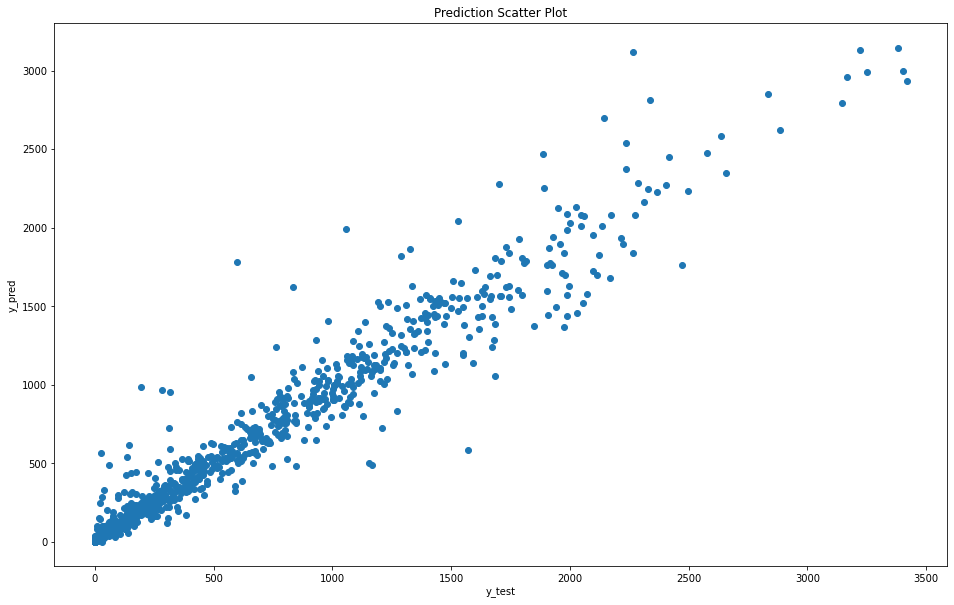

In [ ]:
y_orig = df['Rented Bike Count']
y = pd.Series(ysqrt)
X = df.drop(['Rented Bike Count'], axis=1)

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from statistics import mean 
import scipy

final_rmse_list = []
final_mae_list = []
final_r2_list = []

for i in range(5):

  kf = KFold(n_splits=10, shuffle=True) # Define the split - into 5 folds 
  kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
  print(kf) 
  X.shape
  reg = GradientBoostingRegressor(random_state=0, max_depth=4, loss='huber',n_estimators=1000, criterion='mse', alpha=0.9)
  # reg = ElasticNet(random_state=0)
  # reg = SGDRegressor(max_iter=10000, tol=1e-3)
  # reg = KNeighborsRegressor(n_neighbors=25)
  # reg = tree.DecisionTreeRegressor()
  # reg = RandomForestRegressor(n_estimators=200, max_depth=None, min_samples_split=3, random_state=0) # 216! Nice
  # reg = AdaBoostRegressor(random_state=0, n_estimators=100) # 353
  # reg = BaggingRegressor(base_estimator=SVR(), n_estimators=10, random_state=0)
  # reg = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)) # 371


  rmse_list = []
  mae_list = []
  r2_list = []
  for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    
    Q1 = y_train.quantile(0.25)
    Q3 = y_train.quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    filter = (y_train >= Q1 - 1.5 * IQR) & (y_train <= Q3 + 1.5 *IQR)
    y_train = y_train.loc[filter] 
    X_train = X_train.loc[filter] 

    y_orig_train, y_orig_test = y_orig.iloc[train_index], y_orig.iloc[test_index]
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    y_orig_pred = np.square(y_pred)

    rmse_list.append(mean_squared_error(y_orig_test, y_orig_pred, squared=False))
    mae_list.append(mean_absolute_error(y_orig_test, y_orig_pred))
    r2_list.append(r2_score(y_orig_test, y_orig_pred))
  
  print('rmse = ' + str(mean(rmse_list)))
  final_rmse_list.append(mean(rmse_list))
  print('mae = ' + str(mean(mae_list)))
  final_mae_list.append(mean(mae_list))
  print('r2 = ' + str(mean(r2_list)))
  final_r2_list.append(mean(r2_list))

print('Finish')
print('mean rmse = ' + str(mean(final_rmse_list)))
print('mean mae = ' + str(mean(final_mae_list)))
print('mean r2 = ' + str(mean(final_r2_list)))

fig, ax = plt.subplots(figsize=(16, 10))
ax.scatter(y_orig_test, y_orig_pred)
ax.set_title('Prediction Scatter Plot')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [ ]:
y_orig = df['Rented Bike Count']
y = pd.Series(ysqrt)
X = df.drop(['Rented Bike Count'], axis=1)

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.metrics import mean_squared_error
from statistics import mean 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold # import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from statistics import mean 
from lightgbm import LGBMRegressor
import scipy

final_rmse_list = []
final_mae_list = []
final_r2_list = []

for i in range(5):

  kf = KFold(n_splits=10, shuffle=True) # Define the split - into 5 folds 
  kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
  print(kf) 
  X.shape
  # reg = GradientBoostingRegressor(random_state=0, max_depth=4, loss='huber',n_estimators=1000, criterion='mse', alpha=0.9) # 161 WOW!
  # reg = ElasticNet(random_state=0)
  # reg = SGDRegressor(max_iter=10000, tol=1e-3)
  # reg = KNeighborsRegressor(n_neighbors=25)
  # reg = tree.DecisionTreeRegressor()
  # reg = RandomForestRegressor(n_estimators=200, max_depth=None, min_samples_split=3, random_state=0) # 216! Nice
  # reg = AdaBoostRegressor(random_state=0, n_estimators=100) # 353
  # reg = BaggingRegressor(base_estimator=SVR(), n_estimators=10, random_state=0)
  # reg = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)) # 371
  reg = LGBMRegressor(n_estimators=1000) # 145! Outstanding!
  # reg = LGBMRegressor(n_estimators=1000, reg_alpha=0.35)


  rmse_list = []
  mae_list = []
  r2_list = []
  for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    Q1 = y_train.quantile(0.25)
    Q3 = y_train.quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 
    filter = (y_train >= Q1 - 1.5 * IQR) & (y_train <= Q3 + 1.5 *IQR)
    y_train = y_train.loc[filter] 
    X_train = X_train.loc[filter] 

    y_orig_train, y_orig_test = y_orig.iloc[train_index], y_orig.iloc[test_index]
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    y_orig_pred = np.square(y_pred)

    rmse_list.append(mean_squared_error(y_orig_test, y_orig_pred, squared=False))
    mae_list.append(mean_absolute_error(y_orig_test, y_orig_pred))
    r2_list.append(r2_score(y_orig_test, y_orig_pred))
  
  print('rmse = ' + str(mean(rmse_list)))
  final_rmse_list.append(mean(rmse_list))
  print('mae = ' + str(mean(mae_list)))
  final_mae_list.append(mean(mae_list))
  print('r2 = ' + str(mean(r2_list)))
  final_r2_list.append(mean(r2_list))

print('Finish')
print('mean rmse = ' + str(mean(final_rmse_list)))
print('mean mae = ' + str(mean(final_mae_list)))
print('mean r2 = ' + str(mean(final_r2_list)))

fig, ax = plt.subplots(figsize=(16, 10))
ax.scatter(y_orig_test, y_orig_pred)
ax.set_title('Prediction Scatter Plot')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')